In [72]:
#all imports
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sb
from pandas_datareader import data as pdr
import time 
import datetime

In [74]:
# yfinance dataframe
yf.pdr_override() 

#set company ticker symbol
company = "AAPL"

# download dataframe
# SET YOUR ANALYSIS DATE WINDOW --> HERE SET TO YEAR 
data = pdr.get_data_yahoo(company, start="2020-01-01", end="2020-09-10")



[*********************100%***********************]  1 of 1 completed


In [75]:
# dataframe for model
prices = data[data.columns[0:1]]
prices.reset_index(level=0,inplace = True)
prices

,Date,Open
0,2019-12-31,72.482498
1,2020-01-02,74.059998
2,2020-01-03,74.287498
3,2020-01-06,73.447502
4,2020-01-07,74.959999
...,...,...
170,2020-09-02,137.589996
171,2020-09-03,126.910004
172,2020-09-04,120.070000
173,2020-09-08,113.949997


<AxesSubplot:xlabel='Date', ylabel='Open'>

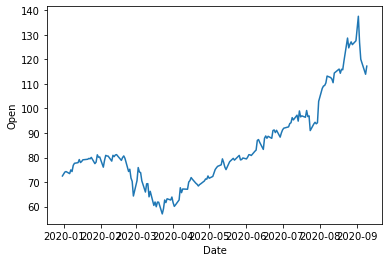

In [76]:
#basic visualization of dataframe
sb.lineplot(x="Date", y="Open", data=prices,)

In [77]:
# preparing dataset for prediction

# converting date to timestamps
prices["timestamp"] = (pd.to_datetime(prices.Date).astype(int)) // (10**9)

# dropping date column
prices = prices.drop(['Date'], axis=1)
prices

# X-axis == timestamp , Y-axis == Open

,Open,timestamp
0,72.482498,1577750400
1,74.059998,1577923200
2,74.287498,1578009600
3,73.447502,1578268800
4,74.959999,1578355200
...,...,...
170,137.589996,1599004800
171,126.910004,1599091200
172,120.070000,1599177600
173,113.949997,1599523200


In [78]:
# imports for Machine Learning
from numpy import arange
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt 

In [88]:
# train & test set split
dataset = prices.values

X = dataset[:,1].reshape(-1,1)
Y = dataset[:,0:1]

validation_size = 0.15
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Rescaling Data not required due to presence of only one parameter --> timestamp
# Very common used rescaling models are MinMaxScaler and StandardScaler

# # Standardising Data
# scalar = StandardScaler().fit(X)
# X = scalar.transform(X)
# set_printoptions(precision=3)

# scalar = StandardScaler().fit(Y)
# Y = scalar.transform(Y)
# set_printoptions(precision=3)


# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR : 0.517396 (0.107105)
 LASSO : 0.517396 (0.107105)
 EN : 0.517396 (0.107105)
 KNN : 0.978674 (0.012017)
 CART : 0.976339 (0.014414)
 SVR : 0.798793 (0.075604)


In [97]:
# Define model
model = DecisionTreeRegressor()
# Fit to model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X)
print(mean_squared_error(Y, predictions))

0.4021141328396542


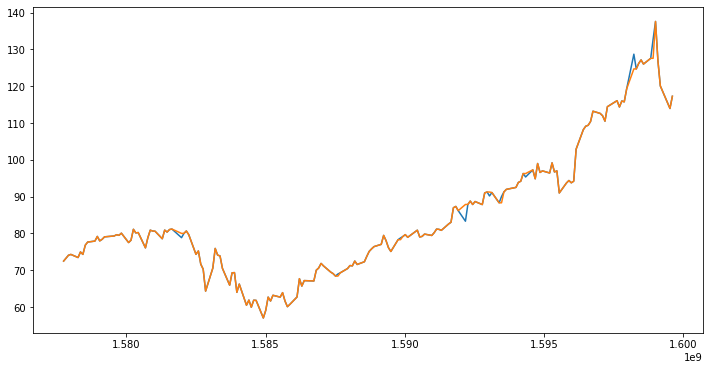

In [98]:
%matplotlib inline 

fig= plt.figure(figsize=(12,6))

plt.plot(X,Y)
plt.plot(X,predictions)
plt.show()

In [ ]:
# To predict for days ahead 
# Make and array of few days ahead
# Create timestamp 
# predict on fitted model